## Imports 

In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import keras
import os
import matplotlib.pyplot as plt



## Load dataset Directory

In [2]:
# !unzip archive.zip -d /content/dataset

## Load Dataset

In [3]:
train_df=pd.read_csv(os.getcwd( )+'/sign_mnist_train.csv')
test_df=pd.read_csv(os.getcwd( )+'/sign_mnist_test.csv')

In [4]:
 test_df.loc[:8, "label"]

0     6
1     5
2    10
3     0
4     3
5    21
6    10
7    14
8     3
Name: label, dtype: int64

In [5]:
train_df_images = train_df.loc[:, "pixel1":]
train_df_label = train_df.loc[:, "label"]

test_df_images = test_df.loc[:, "pixel1":]
test_df_label  = test_df.loc[:, "label"]

In [6]:
test_df_images=test_df_images/255.0
train_df_images=train_df_images/255.0

In [7]:
class_names = ['A', 'B', 'C', 'D', 'E','F', 'G', 'H', 'I', 'J','K','L','M','N','O','P','Q','R','S','T','V','W','X','Y','Z']

class_names[0]

'A'

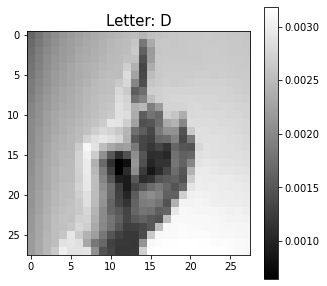

In [8]:
data_array = np.array(train_df_images.loc[0, :])
shaped_data = np.reshape(data_array, (28, 28))

plt.figure(figsize = (5,5))
sign_img = plt.imshow(shaped_data/255.0, cmap=plt.cm.gray)
plt.colorbar(sign_img)
plt.title("Letter: "+class_names[train_df_label[0]], fontsize=15)
plt.show()

In [9]:
train_df_images = np.array(train_df_images)
test_df_images = np.array(test_df_images)

train_df_images = train_df_images.reshape(train_df_images.shape[0], 28, 28, 1)
test_df_images = test_df_images.reshape(test_df_images.shape[0], 28, 28, 1)

print(train_df_images.shape, test_df_images.shape)

(27455, 28, 28, 1) (7172, 28, 28, 1)


In [10]:
nclasses = train_df_label.min()
nclasses

0

In [11]:
nclasses = train_df_label.max() - train_df_label.min() + 1
train_df_label = tf.keras.utils.to_categorical(train_df_label, num_classes = nclasses)
print("Shape of ytrain after encoding: ", train_df_label.shape)


Shape of ytrain after encoding:  (27455, 25)


In [12]:

test_df_label = tf.keras.utils.to_categorical(test_df_label, num_classes = nclasses)
print("Shape of ytest after encoding: ", test_df_label.shape)

Shape of ytest after encoding:  (7172, 25)


## Visualize data

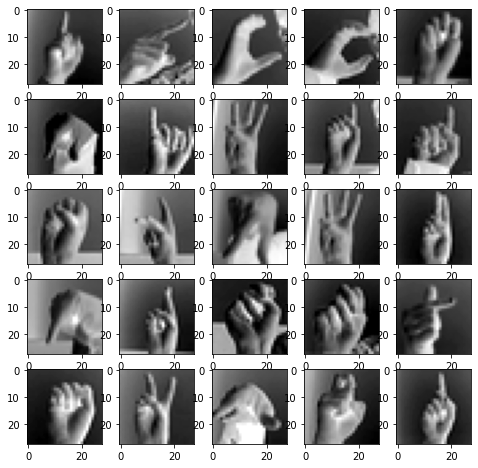

In [13]:
w=10
h=10
fig=plt.figure(figsize=(8,8))
columns = 5
rows = 5
for i in range(0, columns*rows):
    img = train_df_images[i]
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
plt.show()



## Create Model

In [14]:
model = keras.Sequential([
    keras.layers.Conv2D(24, (5, 5), padding = "same", input_shape=(28,28,1)),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(32, (5, 5), padding = "same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (5, 5), padding = "same"),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(128, (5, 5), padding = "same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=[2,2]),


    keras.layers.Conv2D(128, (5, 5), padding = "same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(256, (5, 5), padding = "same"), 
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(1024,kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Activation('relu'),

    keras.layers.Dense(25, activation='softmax'),
    ])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 24)        624       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        19232     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0

## Compile and Train

In [15]:
sgd = keras.optimizers.SGD(lr=1e-2)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
history = model.fit(train_df_images, train_df_label, epochs=10, validation_split=0.2)

Epoch 1/10
687/687 [==============================] - 4s 6ms/step - loss: 12.9951 - accuracy: 0.8289 - val_loss: 10.8124 - val_accuracy: 0.9998
Epoch 2/10
687/687 [==============================] - 4s 6ms/step - loss: 9.4651 - accuracy: 0.9989 - val_loss: 8.2114 - val_accuracy: 1.0000
Epoch 3/10
687/687 [==============================] - 4s 6ms/step - loss: 7.1931 - accuracy: 0.9999 - val_loss: 6.2441 - val_accuracy: 1.0000
Epoch 4/10
687/687 [==============================] - 4s 6ms/step - loss: 5.4713 - accuracy: 0.9999 - val_loss: 4.7498 - val_accuracy: 1.0000
Epoch 5/10
687/687 [==============================] - 4s 6ms/step - loss: 4.1637 - accuracy: 1.0000 - val_loss: 3.6154 - val_accuracy: 1.0000
Epoch 6/10
687/687 [==============================] - 4s 6ms/step - loss: 3.1706 - accuracy: 1.0000 - val_loss: 2.7524 - val_accuracy: 1.0000
Epoch 7/10
687/687 [==============================] - 4s 6ms/step - loss: 2.4164 - accuracy: 1.0000 - val_loss: 2.0974 - val_accuracy: 1.0000
Epoc

Text(0.5, 1.0, 'Loss')

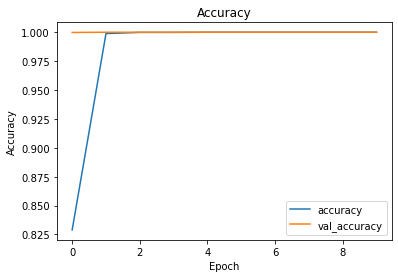

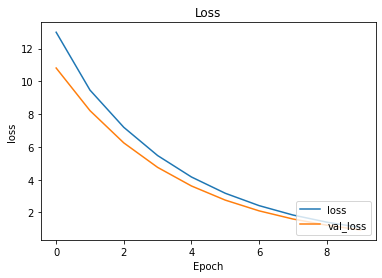

In [17]:
plt.figure(1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Accuracy")

plt.figure(2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Loss")


## Evaluate and predict using the model


In [18]:

vc_loss, vc_accuracy = model.evaluate(test_df_images, test_df_label)
print("\nLOSS: {}\nACCURACY: {}".format(vc_loss, vc_accuracy))

225/225 [==============================] - 1s 3ms/step - loss: 1.0047 - accuracy: 0.9721

LOSS: 1.0046998262405396
ACCURACY: 0.9721137881278992


In [19]:
predictions = model.predict(test_df_images)

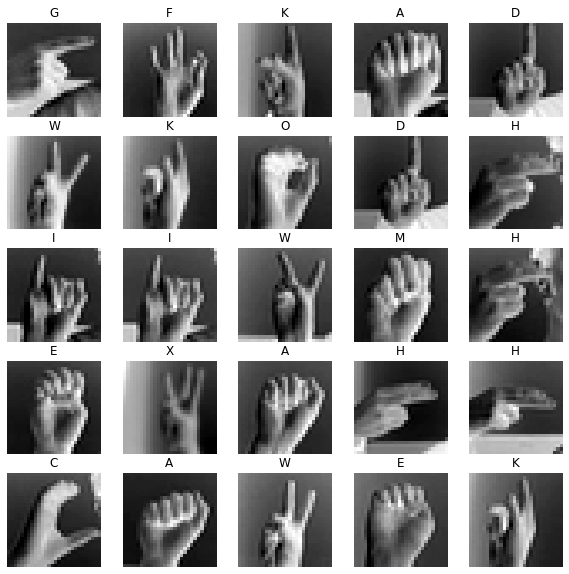

In [20]:
plt.figure(figsize=(10,10))
columns = 5
rows = 5
for i in range(0, columns*rows):
    img = test_df_images[i]    
    plt.subplot(rows, columns,i+1)
    plt.grid(False)
    plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
    plt.title(class_names[np.argmax(predictions[i])])
    plt.axis('off')
plt.show()


In [21]:
model.save("Sign_mnist_baseline.h5")
base_file_size = (os.stat('Sign_mnist_baseline.h5').st_size)/(1024*1024)

## 1.B Tensorflow Lite 

In [22]:
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(train_df_images.astype(np.float32)).batch(1).take(100):
    yield [input_value]

In [23]:
import pathlib

tflite_models_dir = pathlib.Path(os.getcwd( )+"/content12/sign_mnist_tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.representative_dataset = representative_data_gen
tflite_model = converter.convert()

tflite_model_quant_file = tflite_models_dir/"sign_mnist_model.tflite"
tflite_model_quant_file.write_bytes(tflite_model )

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpwu57_02u/assets


15570644

In [25]:
interpreter = tf.lite.Interpreter(model_path=str(tflite_model_quant_file))
interpreter.allocate_tensors()

**RUNNING INFERENCE ON SINGLE IMAGE**


In [26]:
test_image = np.expand_dims(test_df_images[1], axis=0).astype(np.float32)

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]
interpreter.allocate_tensors()
interpreter.set_tensor(input_index,test_image)
interpreter.invoke()
predictions = interpreter.get_tensor(output_index)

Text(0.5, 1.0, 'F')

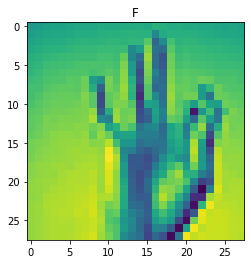

In [27]:
plt.imshow(np.squeeze(test_df_images[1]))
plt.title(class_names[np.argmax(predictions)])

**Model Accuracy for sign_mnist_model.tflite**


In [28]:


interpreter.resize_tensor_input(input_index, (test_df_images.shape[0], 28, 28, 1))
interpreter.resize_tensor_input(output_index, (test_df_images.shape[0], 25))
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]


interpreter.set_tensor(input_index, test_df_images.astype(np.float32))
interpreter.invoke()
predictions = interpreter.get_tensor(output_index)


np.argmax(predictions[1])

5

In [29]:
np.argmax(test_df_label[1])

5

In [30]:
accurate_count = 0
accuracy = 0 
for index in range(len(predictions)):
  data = np.argmax(predictions[index])
  if data == np.argmax(test_df_label[index]):
    accurate_count += 1
accuracy_bm = accurate_count * 1.0 / len(predictions)
print("Accuracy using sign_mnist_model is:", accuracy_bm)

Accuracy using sign_mnist_model is: 0.9721137757947574


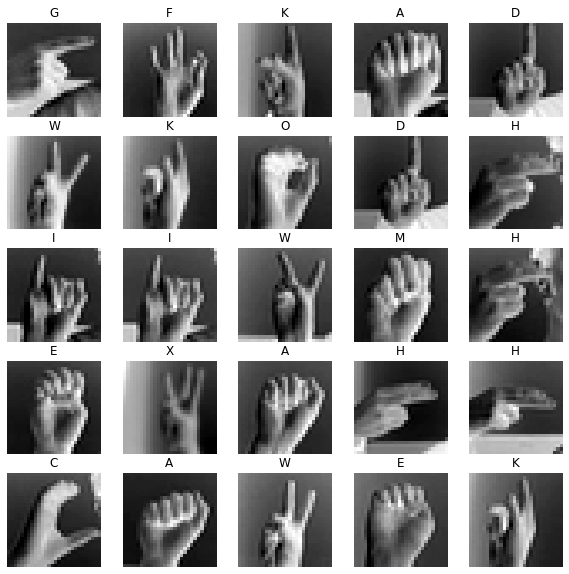

In [31]:
plt.figure(figsize=(10,10))
columns = 5
rows = 5
for i in range(0, columns*rows):
    img = test_df_images[i]    
    plt.subplot(rows, columns,i+1)
    plt.grid(False)
    plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
    plt.title(class_names[np.argmax(predictions[i])])
    plt.axis('off')
plt.show()


**16-bit floating point values quantization**





In [32]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
converter.representative_dataset = representative_data_gen

In [33]:
tflite_fp16_model = converter.convert()

tflite_model_quant16_file = tflite_models_dir/"sign_mnist_model_quant_f16.tflite"
tflite_model_quant16_file.write_bytes(tflite_fp16_model)

INFO:tensorflow:Assets written to: /tmp/tmpgiz4xbna/assets


INFO:tensorflow:Assets written to: /tmp/tmpgiz4xbna/assets


7791152

In [34]:
interpreter_fp16 = tf.lite.Interpreter(model_path=str(tflite_model_quant16_file))
interpreter_fp16.allocate_tensors()


In [35]:


input_index_fp16 = interpreter_fp16.get_input_details()[0]["index"]
output_index_fp16 = interpreter_fp16.get_output_details()[0]["index"]

interpreter_fp16.resize_tensor_input(input_index_fp16, (test_df_images.shape[0], 28, 28, 1))
interpreter_fp16.resize_tensor_input(output_index_fp16, (test_df_images.shape[0], 25))
interpreter_fp16.allocate_tensors()

input_index_fp16 = interpreter_fp16.get_input_details()[0]["index"]
output_index_fp16 = interpreter_fp16.get_output_details()[0]["index"]


interpreter_fp16.set_tensor(input_index_fp16, test_df_images.astype(np.float32))
interpreter_fp16.invoke()
predictions_fp16 = interpreter_fp16.get_tensor(output_index_fp16)

In [36]:
accurate_count = 0
accuracy = 0 
for index in range(len(predictions_fp16)):
  data = np.argmax(predictions_fp16[index])
  if data == np.argmax(test_df_label[index]):
    accurate_count += 1
accuracy_f16 = accurate_count * 1.0 / len(predictions_fp16)
print("Accuracy using sign_mnist_model_fp16 is:", accuracy_f16)

Accuracy using sign_mnist_model_fp16 is: 0.9719743446737312


In [37]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
tflite_quant_model_dyn = converter.convert()
tflite_model_quant_dyn_file = tflite_models_dir/"sign_mnist_model_quant_dyn.tflite"
tflite_model_quant_dyn_file.write_bytes(tflite_quant_model_dyn)

INFO:tensorflow:Assets written to: /tmp/tmp96dquc52/assets


INFO:tensorflow:Assets written to: /tmp/tmp96dquc52/assets


3924304

In [38]:
interpreter_dyn = tf.lite.Interpreter(model_path=str(tflite_model_quant16_file))
interpreter_dyn.allocate_tensors()

In [39]:
input_index_dyn = interpreter_dyn.get_input_details()[0]["index"]
output_index_dyn = interpreter_dyn.get_output_details()[0]["index"]

interpreter_dyn.resize_tensor_input(input_index_dyn, (test_df_images.shape[0], 28, 28, 1))
interpreter_dyn.resize_tensor_input(output_index_dyn, (test_df_images.shape[0], 25))
interpreter_dyn.allocate_tensors()

input_index_dyn = interpreter_dyn.get_input_details()[0]["index"]
output_index_dyn = interpreter_dyn.get_output_details()[0]["index"]


interpreter_dyn.set_tensor(input_index_dyn, test_df_images.astype(np.float32))
interpreter_dyn.invoke()
predictions_dyn = interpreter_dyn.get_tensor(output_index_dyn)

In [40]:
accurate_count = 0
accuracy = 0 
for index in range(len(predictions_dyn)):
  data = np.argmax(predictions_dyn[index])
  if data == np.argmax(test_df_label[index]):
    accurate_count += 1
accuracy_dyn = accurate_count * 1.0 / len(predictions_dyn)
print("Accuracy using sign_mnist_model_dyn is:", accuracy_dyn)

Accuracy using sign_mnist_model_dyn is: 0.9719743446737312


In [41]:


converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen

# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model_quant_int8 = converter.convert()
tflite_model_quant_int_file = tflite_models_dir/"sign_mnist_model_quant_int8.tflite"
tflite_model_quant_int_file.write_bytes(tflite_model_quant_int8)

INFO:tensorflow:Assets written to: /tmp/tmp9ru364bg/assets


INFO:tensorflow:Assets written to: /tmp/tmp9ru364bg/assets


3924384

In [68]:
tflite_file = (os.stat(str(tflite_model_quant_file)).st_size)/(1024*1024)
tflite_f16_file = (os.stat(str(tflite_model_quant16_file)).st_size)/(1024*1024)
tflite_dyn_file = (os.stat(str(tflite_model_quant_dyn_file)).st_size)/(1024*1024)
tflite_int_file = (os.stat(str(tflite_model_quant_int_file)).st_size)/(1024*1024)


In [43]:
def run_tflite_model(tflite_file, test_image_indices):
  global test_df_images
  
  # Initialize the interpreter
  interpreter = tf.lite.Interpreter(str(tflite_file))
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = np.zeros((len(test_image_indices),), dtype=int)
  for i, test_image_index in enumerate(test_image_indices):
    
    test_image = test_df_images[test_image_index]
    test_label = test_df_images[test_image_index]

    # Check if the input type is quantized, then rescale input data to uint8
    if input_details['dtype'] == np.uint8:
      input_scale, input_zero_point = input_details["quantization"]
      test_image = test_image / input_scale + input_zero_point

    test_image = np.expand_dims(test_image, axis=0).astype(input_details["dtype"])
    interpreter.set_tensor(input_details["index"], test_image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]

    predictions[i] = output.argmax()
    # print(str(predictions[i]))
  return predictions

In [44]:
def evaluate_model(tflite_file, model_type):
  global test_df_images
  global test_df_label

  test_image_indices = range(test_df_images.shape[0])
  predictions = run_tflite_model(tflite_file, test_image_indices)

 
  return predictions

In [45]:
prediction_int= evaluate_model(tflite_model_quant_int_file, model_type="Quantized")


In [46]:
accurate_count = 0
accuracy = 0 
for index in range(len(prediction_int)):
  # data = np.argmax(predictions_int8[index])
  if prediction_int[index] == np.argmax(test_df_label[index]):
    accurate_count += 1
accuracy_int = accurate_count * 1.0 / len(prediction_int)
print("Accuracy using sign_mnist_model_int is:", accuracy_int)

Accuracy using sign_mnist_model_int is: 0.9715560513106526


In [47]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='sgd',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
quantize_layer (QuantizeLaye (None, 28, 28, 1)         3         
_________________________________________________________________
quant_conv2d (QuantizeWrappe (None, 28, 28, 24)        675       
_________________________________________________________________
quant_activation (QuantizeWr (None, 28, 28, 24)        3         
_________________________________________________________________
quant_conv2d_1 (QuantizeWrap (None, 28, 28, 32)        19297     
_________________________________________________________________
quant_batch_normalization (Q (None, 28, 28, 32)        129       
_________________________________________________________________
quant_activation_1 (Quantize (None, 28, 28, 32)        3         
_________________________________________________________________
quant_max_pooling2d (Quantiz (None, 14, 14, 32)        1

In [48]:
history_quant = q_aware_model.fit(train_df_images, train_df_label, epochs=10, validation_split=0.2)

Epoch 1/10
687/687 [==============================] - 17s 25ms/step - loss: 3.1173 - accuracy: 0.9997 - val_loss: 3.0027 - val_accuracy: 1.0000
Epoch 2/10
687/687 [==============================] - 17s 25ms/step - loss: 2.9199 - accuracy: 1.0000 - val_loss: 2.8354 - val_accuracy: 1.0000
Epoch 3/10
687/687 [==============================] - 17s 25ms/step - loss: 2.7735 - accuracy: 1.0000 - val_loss: 2.7086 - val_accuracy: 1.0000
Epoch 4/10
687/687 [==============================] - 17s 25ms/step - loss: 2.6621 - accuracy: 1.0000 - val_loss: 2.6124 - val_accuracy: 1.0000
Epoch 5/10
687/687 [==============================] - 17s 25ms/step - loss: 2.5774 - accuracy: 1.0000 - val_loss: 2.5385 - val_accuracy: 1.0000
Epoch 6/10
687/687 [==============================] - 17s 25ms/step - loss: 2.5129 - accuracy: 1.0000 - val_loss: 2.4826 - val_accuracy: 1.0000
Epoch 7/10
687/687 [==============================] - 17s 25ms/step - loss: 2.4637 - accuracy: 1.0000 - val_loss: 2.4400 - val_accuracy:

Text(0.5, 1.0, 'Loss')

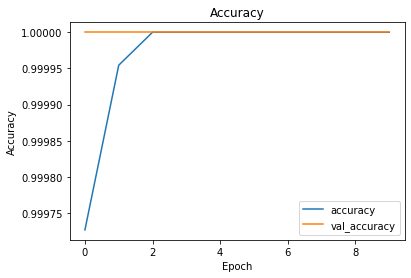

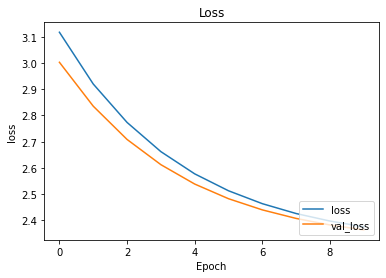

In [49]:
plt.figure(3)
plt.plot(history_quant.history['accuracy'], label='accuracy')
plt.plot(history_quant.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Accuracy")

plt.figure(4)
plt.plot(history_quant.history['loss'], label='loss')
plt.plot(history_quant.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Loss")


In [50]:
vc_loss1, vc_accuracy1 = q_aware_model.evaluate(test_df_images, test_df_label)
print("\nLOSS: {}\nACCURACY: {}".format(vc_loss1, vc_accuracy1))

225/225 [==============================] - 2s 7ms/step - loss: 2.4000 - accuracy: 0.9784

LOSS: 2.39998722076416
ACCURACY: 0.9783881902694702


In [51]:
quant_file = model.save('quant_aware.h5')
quant_file_size = (os.stat('quant_aware.h5').st_size)/(1024*1024)


In [78]:

base_red = 0 
tflite_red =((base_file_size - tflite_file) / base_file_size) * 100
tflite_float_red = ((base_file_size - tflite_f16_file) / base_file_size) * 100
tflite_dynamic_red =((base_file_size - tflite_dyn_file) / base_file_size) * 100
tflite_int8_red = ((base_file_size - tflite_int_file) / base_file_size) * 100
quant_qware_red = ((base_file_size - quant_file_size) / base_file_size) * 100

In [82]:
import pandas as  pd 
from tabulate import tabulate


results = [[vc_accuracy,accuracy_bm,accuracy_f16,accuracy_dyn,accuracy_int,vc_accuracy1],[base_file_size,tflite_file,tflite_f16_file,tflite_dyn_file,tflite_int_file,quant_file_size],[base_red,tflite_red,tflite_float_red,tflite_dynamic_red,tflite_int8_red,quant_qware_red]]
colums_names = ['base_model','tflite','tflite_float','tflite_dynamic','tflite_int8','quantization aware training']

In [85]:
df=pd.DataFrame([results[0],results[1],results[2]] , columns= colums_names,index = ('test_accuracy','model_size','percentage_reduction'))
df.style.set_properties(**{'text-align': 'center'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] ) ])
print(tabulate(df, headers='keys', tablefmt='psql'))

+----------------------+--------------+-----------+----------------+------------------+---------------+-------------------------------+
|                      |   base_model |    tflite |   tflite_float |   tflite_dynamic |   tflite_int8 |   quantization aware training |
|----------------------+--------------+-----------+----------------+------------------+---------------+-------------------------------|
| test_accuracy        |     0.972114 |  0.972114 |       0.971974 |         0.971974 |      0.971556 |                      0.978388 |
| model_size           |    14.9219   | 14.8493   |       7.43022  |         3.74251  |      3.74258  |                     14.9219   |
| percentage_reduction |     0        |  0.486312 |      50.2059   |        74.9193   |     74.9188   |                      0        |
+----------------------+--------------+-----------+----------------+------------------+---------------+-------------------------------+


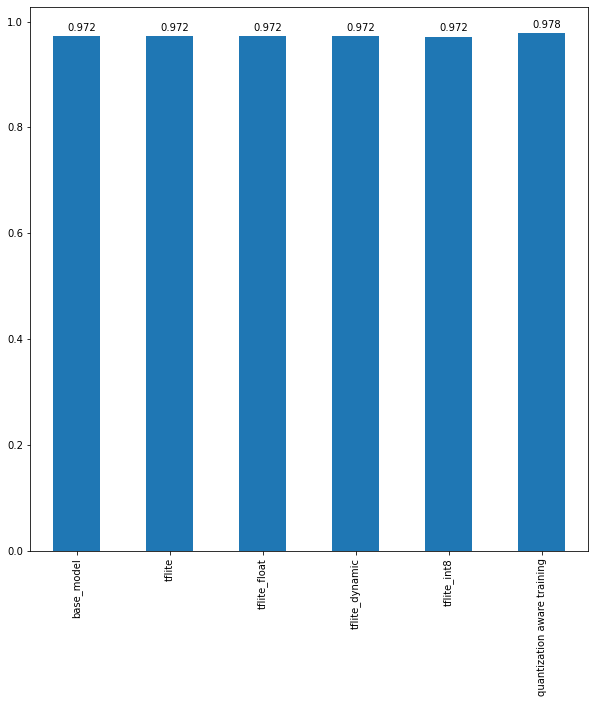

In [86]:
fig = plt.figure(figsize=(10,10))


df.loc['test_accuracy'].plot.bar()

for index, value in enumerate(df.loc['test_accuracy']):
    plt.text(index-0.1, value+0.010, round(value,3))


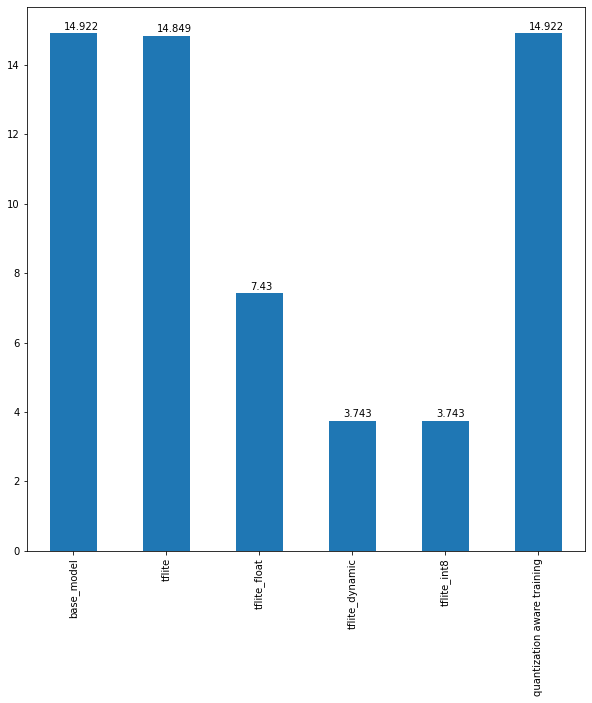

In [87]:
fig = plt.figure(figsize=(10,10))


df.loc['model_size'].plot.bar()

for index, value in enumerate(df.loc['model_size']):
    plt.text(index-0.1, value+0.1, round(value,3))


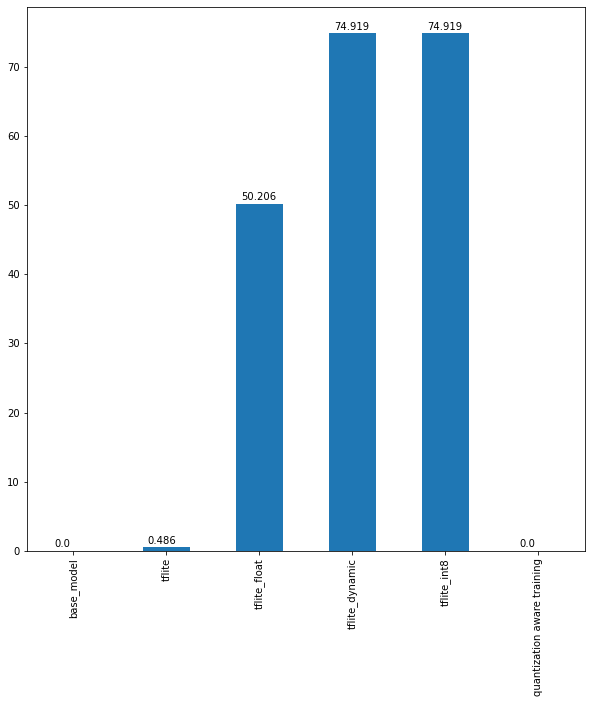

In [90]:
fig = plt.figure(figsize=(10,10))


df.loc['percentage_reduction'].plot.bar()

for index, value in enumerate(df.loc['percentage_reduction']):
    plt.text(index-0.2, value+0.5, round(value,3))

## Observations:

1. From the above graph we can see that the accuracy of the model post purning remains the same but the file size of the model as reduced drastically. 
2. The int8 quantization amd Dynamic quantization gives the same amount of file size reduction akeeping the accuracy constant but innmy case dynamic performed better than int8. 
3. This can be due to the conversion of each test images from float32 to int8 hile inferencing using interpreter. 
4. The quantize aware trainig accuracy increase but doesnot show significant improvement in my case. 
5. The model size has reduced by a great extend of 74.92% 
